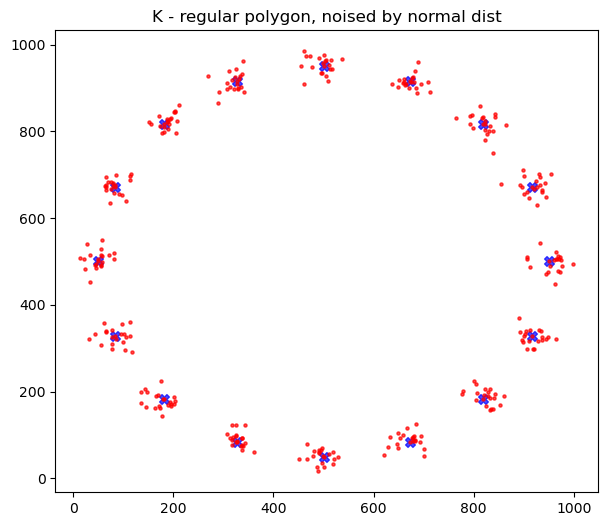

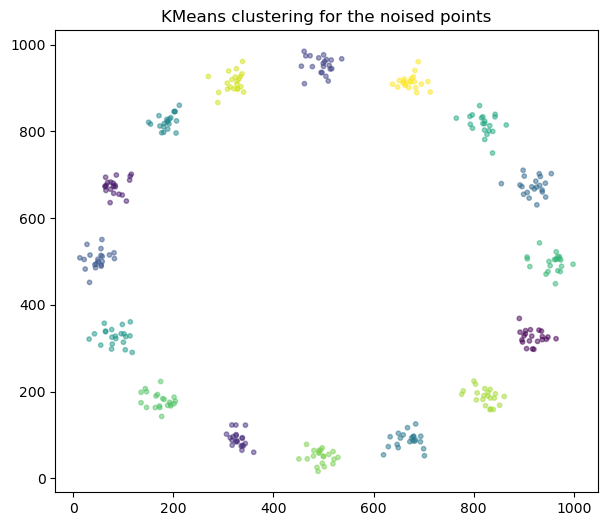

In [3]:
# Zadanie 4 - base
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import math

def generate_regular_polygon(K):
    cx = cy = 500
    r = 450
    points = []
    for i in range(K):
        angle = 2 * math.pi * i / K - math.pi / 2
        x = cx + r * math.cos(angle)
        y = cy + r * math.sin(angle)
        points.append([x, y])
    return points

K = 16
vertices = generate_regular_polygon(K)

plt.figure(figsize=(7, 6))
plt.scatter(
    [l[0] for l in vertices],
    [l[1] for l in vertices],
    c='blue',
    s=50,
    alpha=0.7,
    marker="X"
)


def generate_normal_points(sigma, M):
    points = []
    points.extend(vertices)
    for point in vertices:
        mean = point
        cov = [[sigma, 0], [0, sigma]] 
        n_points = np.random.multivariate_normal(mean, cov, M)
        points.extend(n_points)
    return points

noised_points = generate_normal_points(400, 20)

plt.scatter(
    [l[0] for l in noised_points],
    [l[1] for l in noised_points],
    s=5,
    c='red',
    alpha=0.7
)

plt.title(f"K - regular polygon, noised by normal dist")
plt.show()

kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans.fit(noised_points)

plt.figure(figsize=(7, 6))
plt.scatter(
    [l[0] for l in noised_points],
    [l[1] for l in noised_points],
    s=10,
    c=kmeans.predict(noised_points),
    alpha=0.5,
    cmap='viridis'
)

plt.title("KMeans clustering for the noised points")
plt.show()


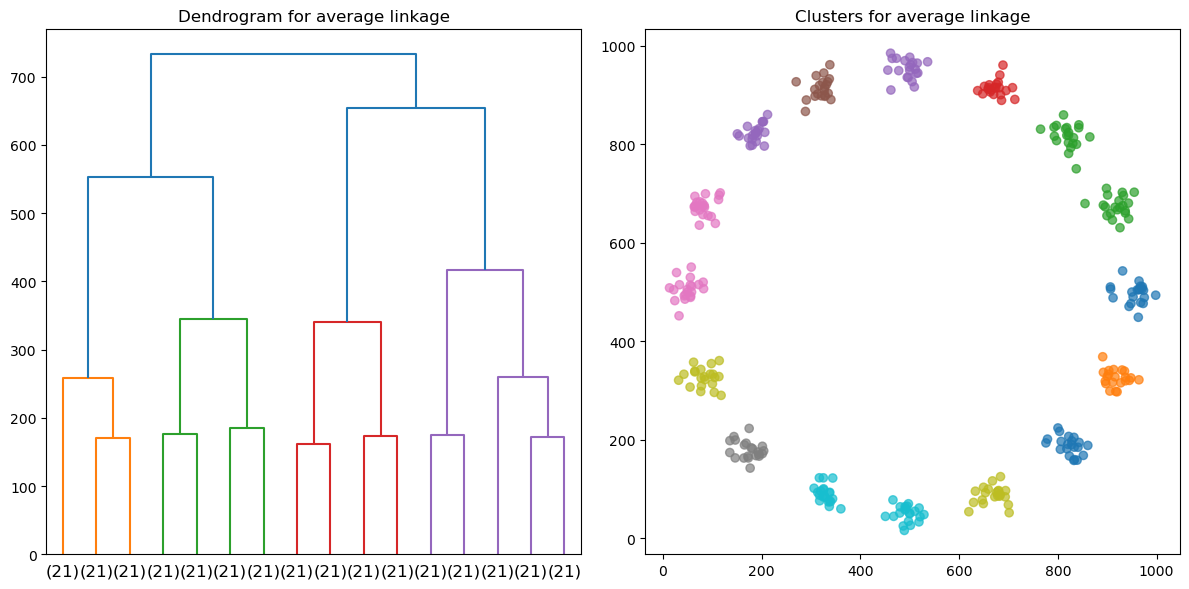

In [4]:
# Zadanie 4 - hierarchiczne grupowanie

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(noised_points, method='average')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

dendrogram(Z, ax=axes[0], truncate_mode='lastp', p=16)
axes[0].set_title("Dendrogram for average linkage")

clusters = fcluster(Z, t=100, criterion='distance')

scatter = axes[1].scatter(
    [l[0] for l in noised_points],
    [l[1] for l in noised_points],
    c=clusters,
    cmap='tab10',
    alpha=0.7
)

axes[1].set_title("Clusters for average linkage")
plt.tight_layout()
plt.show()

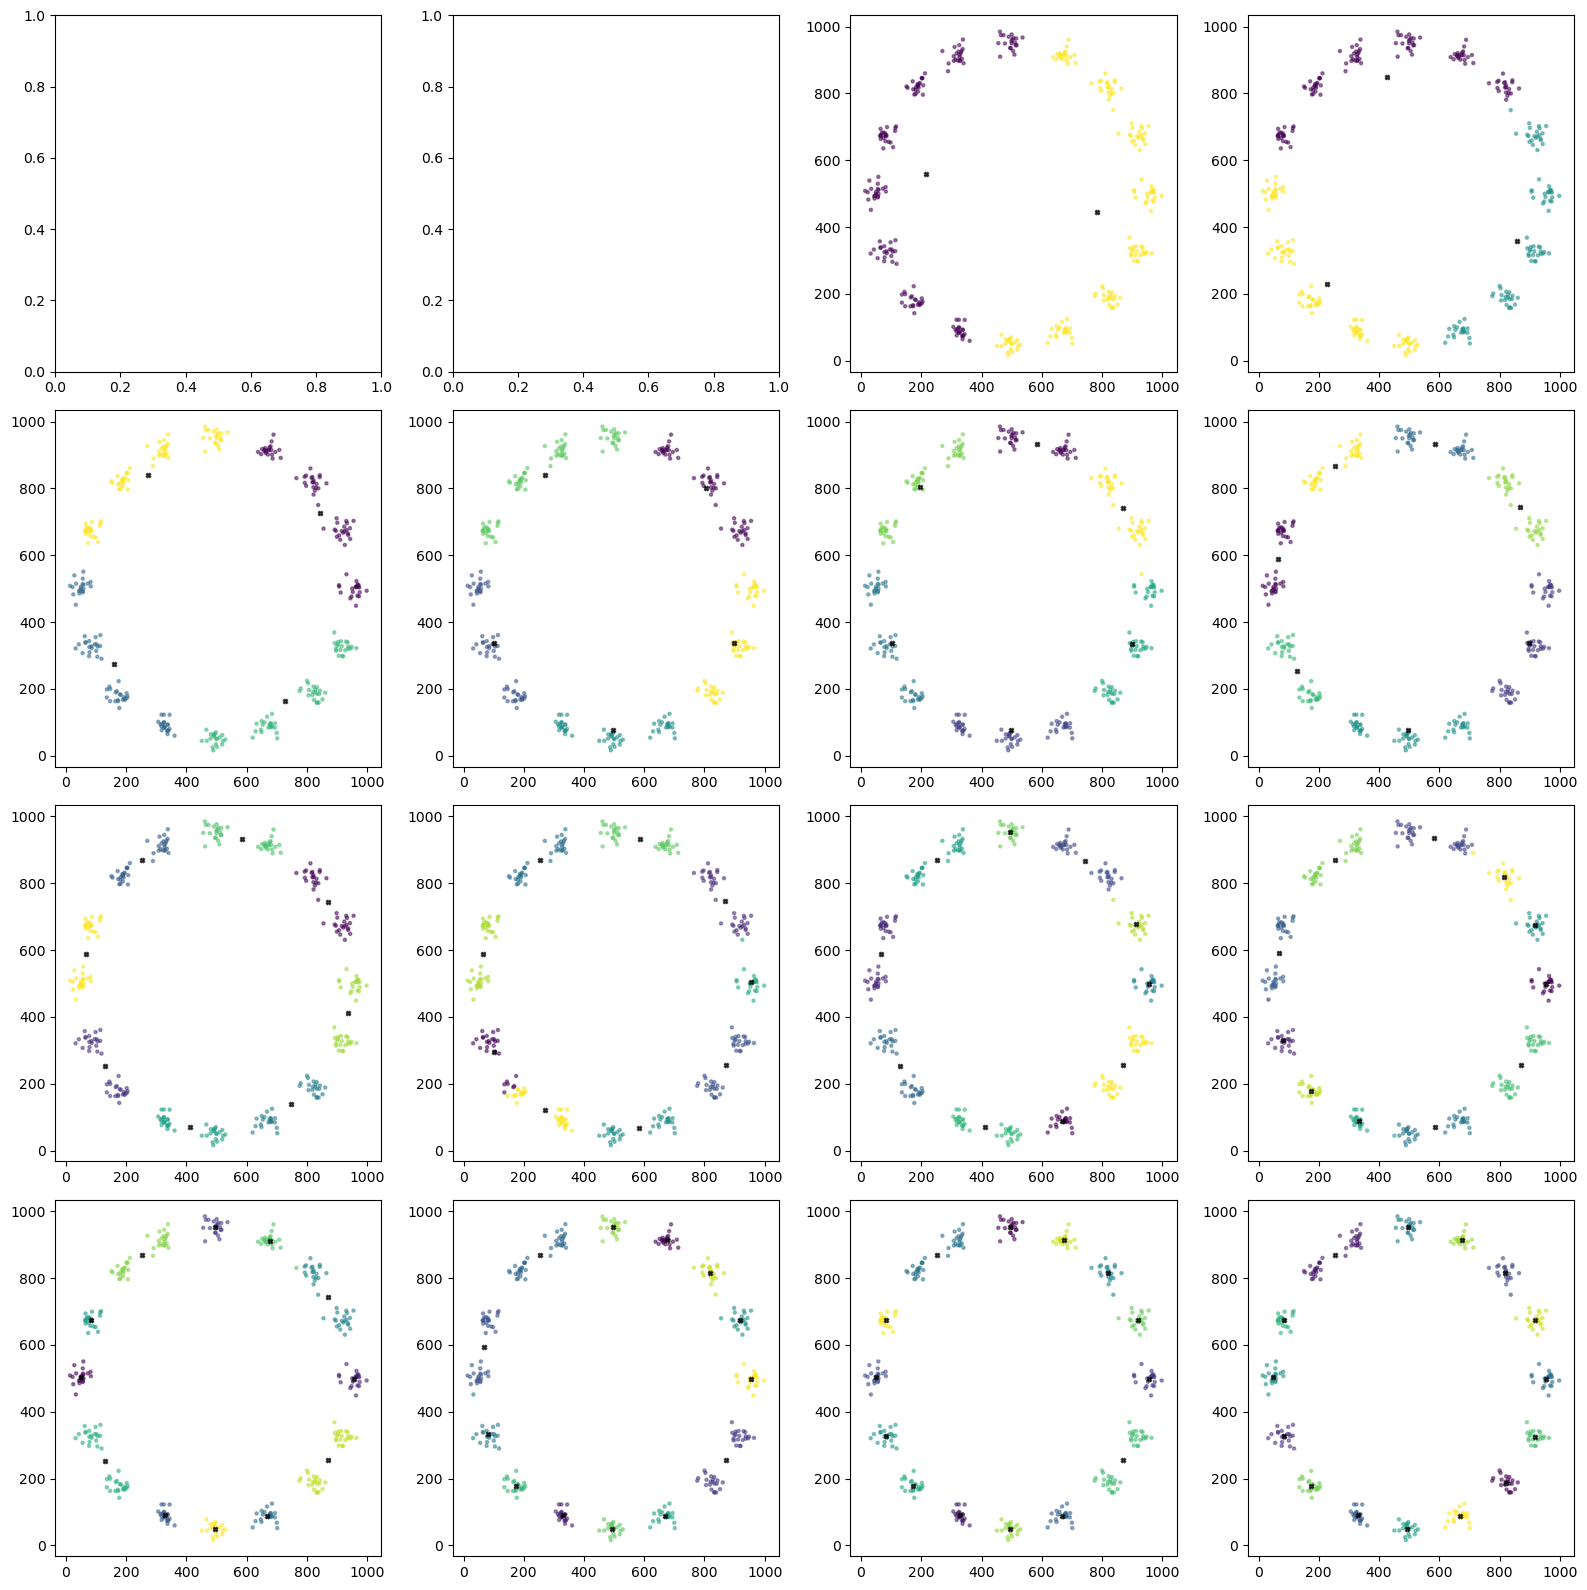

In [5]:
# Zadanie 4 - Kmeans dla różnych k

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for k in range(2, K):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(noised_points)

    ax = axes[k // 4, k % 4]
    ax.scatter(
        [l[0] for l in noised_points],
        [l[1] for l in noised_points],
        c=labels,
        s=5,
        alpha=0.5,
        cmap='viridis'
    )

    ax.scatter(
        [c[0] for c in kmeans.cluster_centers_],
        [c[1] for c in kmeans.cluster_centers_],
        c='black',
        s=10,
        marker="X",
        alpha=0.7
    )

plt.tight_layout()
plt.show()


In [6]:
# Zadanie 4 - KMeans vs MiniBatchKMeans
import time 
from sklearn.cluster import MiniBatchKMeans

K = 1000
M = 10000
pts = generate_regular_polygon(K)
noised_points = generate_normal_points(5, M)

start1 = time.perf_counter()
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit_predict(noised_points)
time1 = time.perf_counter() - start1

start2 = time.perf_counter()
mbkmeans = MiniBatchKMeans(n_clusters=K, random_state=42)
mbkmeans.fit_predict(noised_points)
time2 = time.perf_counter() - start2

print(f"Time to complete clustering for {K}-regular polygon with {M} noised points, using:")
print(f"- KMeans = {time1}")
print(f"- MiniBatchKMeans = {time2}")


Time to complete clustering for 1000-regular polygon with 10000 noised points, using:
- KMeans = 14.728232358000241
- MiniBatchKMeans = 1.5187447579810396
